# Cargando las librerias requeridas

In [38]:
import numpy as np
import pandas as pd
import plotnine as ptn

In [39]:
import sys
print("Python version:", sys.version)
print("Numpy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Plotnine version:", ptn.__version__)

Python version: 3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)]
Numpy version: 1.26.4
Pandas version: 2.3.2
Plotnine version: 0.15.0


In [40]:
from sklearn import datasets

# Cargando el dataset de la flor de iris
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [41]:
# Analizando las variables que tiene
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [42]:
iris_df = pd.DataFrame(data    = iris.data,
                       columns = iris.feature_names)

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


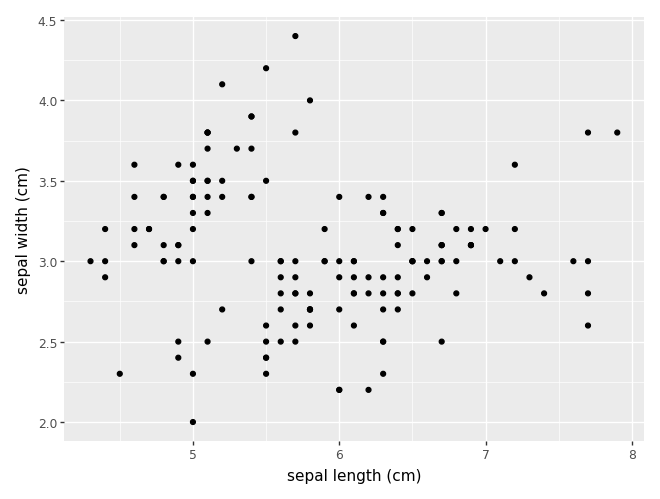

In [43]:
(
    ptn.ggplot(data = iris_df) +
    ptn.aes(x = "sepal length (cm)", y = "sepal width (cm)") +
    ptn.geom_point()
)

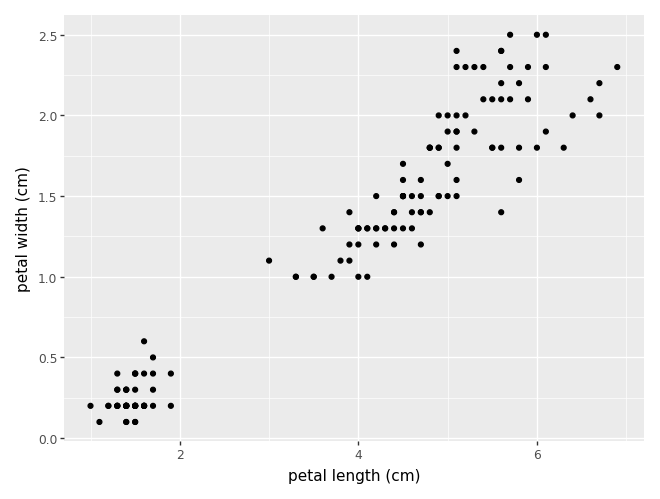

In [44]:
(
    ptn.ggplot(data = iris_df) + 
    ptn.aes(x = "petal length (cm)", y = "petal width (cm)") +
    ptn.geom_point()
)

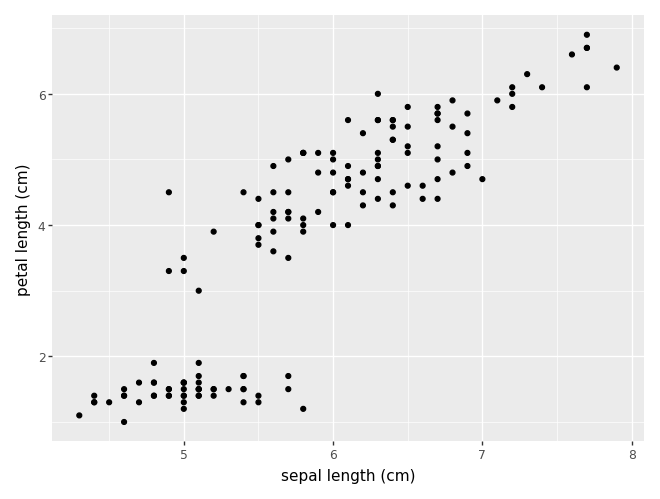

In [45]:
(
    ptn.ggplot(data = iris_df) + 
    ptn.aes(x = "sepal length (cm)", y = "petal length (cm)") +
    ptn.geom_point()
)

# 0. Modelos de la clase sklearn
La mayoría de los modelos de sklearn corresponden a “objetos” de cierta “clase” con propiedades y funciones específicas.

En términos prácticos solo se necesita crear una caja mágica que contiene todo lo necesario para aplicar y analizar los modelos.

- Importar el modelo

``` python
from sklearn.xxx import modeloDeseado
```

- Crear del modelo

``` python
modelo = modeloDeseado()
```

- Aplicar alguna función

``` python
modelo.function()
```

- Ver los valores de un atributo

``` python
modelo.attribute
```


# 1. Clase K-means

## Existen múltiples parámetros para el modelo K-means
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

``` python
from sklearn.cluster import KMeans

modelo_KMeans = KMeans(n_clusters   = 8,
                       init         = ’k-means++’,
                       n_init       = 10,
                       max_iter     = 300,
                       tol          = 0.0001,
                       random_state = None)
```
donde:

- `n_clusters`: número de clusters.
- `init`: ’k-means++’ inicialización inteligente, 'random' aleatoria.
- `n_init`: Número de veces que aplicaremos k-means.
- `max_iter`: Máximo número de iteraciones para cada ejecución.
- `tol`: Tolerancia para la convergencia.
- `random_state`: Semilla para inicializar los centroides. Use un entero para ser determinista.


## Existen múltiple métodos/funciones para el modelo k-means

- Entrenar el modelo usando ciertos datos, retorna el modelo entrenado.
``` python
modelo_KMeans.fit(X = data)
```

- Dado un modelo entrenado, determina a que clase pertenece cada punto, retorna un vector con predicciones.
``` python
modelo_KMeans.predict(X = data)
```

## Caracteristicas del modelo entrenado

Una vez entrenado el modelo, existen nuevas características que podemos observar (atributos)

- `cluster_centers_`: Las coordenadas de los centroides. Si el algoritmo no converge estos no serán consistentes con los labels.
- `inertia_`: la suma total de los within cluster distance.
- `labels_`: Las etiquetas de cada punto (cluster al que pertenece).
- `n_iter_`: número de iteraciones del algoritmo.

### Ajustando (entrenando) el modelo

In [46]:
from sklearn.cluster import KMeans

# Creando un objeto de k-means con las condiciones iniciales
km = KMeans(n_clusters   = 4,
            random_state = 1234)

km

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,1234
,copy_x,True
,algorithm,'lloyd'


In [47]:
# Entrenando el modelo con los datos de iris
km = km.fit(X = iris_df)

km

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,1234
,copy_x,True
,algorithm,'lloyd'


In [48]:
# Mostrando los centros de los clusters
print(km.cluster_centers_)

[[5.006      3.428      1.462      0.246     ]
 [6.29361702 2.9        4.95106383 1.72978723]
 [5.58       2.63333333 3.98666667 1.23333333]
 [7.08695652 3.12608696 6.01304348 2.14347826]]


In [49]:
# Within cluster distance
print(km.inertia_)

57.38387326549492


In [50]:
# Etiquetas
print(km.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 1 2 1 2 2 1 2 1 2 1 1
 1 1 1 1 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 2 2 2 2 2 2 2 3 1 3 1 3 3 2 3 3 3 1
 1 3 1 1 1 1 3 3 1 3 1 3 1 3 3 1 1 1 3 3 3 1 1 1 3 3 1 1 3 3 1 1 3 3 1 1 1
 1 1]


In [51]:
# Número de iteraciones del algoritmo
print(km.n_iter_)

11


### Graficando los clusters

In [52]:
# Creando data frame con los datos y etiquetas
iris_df = pd.DataFrame(data    = iris.data,
                       columns = iris.feature_names)

iris_df['labels'] = km.labels_

print("DATOS ORIGINALES:")
iris_df.head()

DATOS ORIGINALES:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [53]:
# Creando data frame con los centros y etiquetas
iris_km = pd.DataFrame(data    = km.cluster_centers_,
                       columns = iris.feature_names)

iris_km['labels'] = range(km.n_clusters)

print("CENTROIDES:")
iris_km.head()

CENTROIDES:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.006000,3.428000,1.462000,0.246000,0
1,6.293617,2.900000,4.951064,1.729787,1
2,5.580000,2.633333,3.986667,1.233333,2
3,7.086957,3.126087,6.013043,2.143478,3


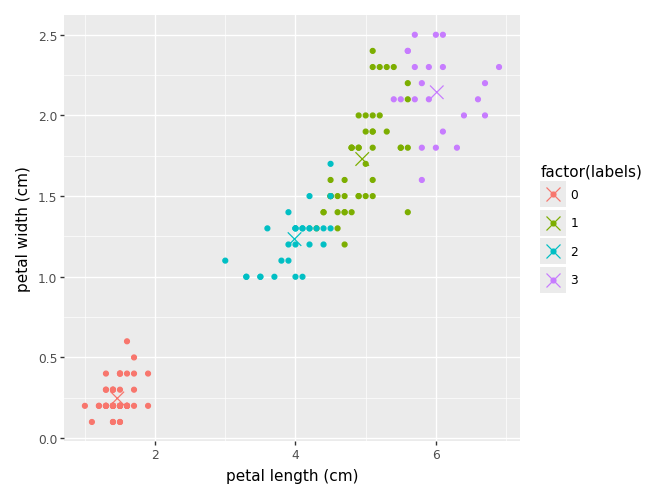

In [54]:
# creando el gráfico
(
    ptn.ggplot(data = iris_df) + 
    ptn.aes(x = "petal length (cm)", y = "petal width (cm)", color = "factor(labels)") + 
    ptn.geom_point() + 
    ptn.geom_point(data = iris_km, shape = "x", size = 5)
)

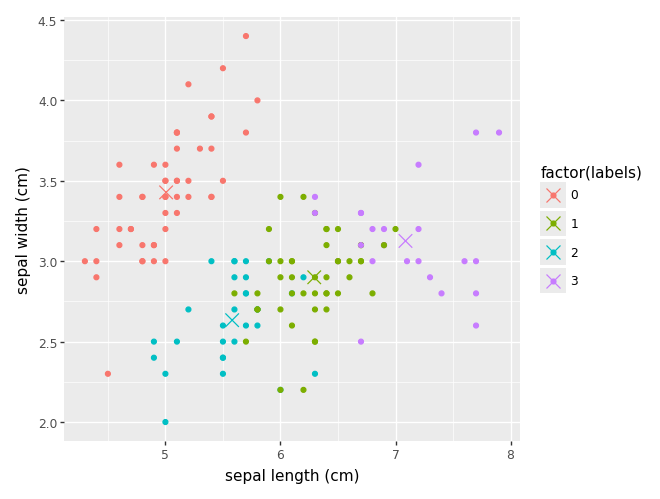

In [55]:
(
    ptn.ggplot(data = iris_df) +
    ptn.aes(x = "sepal length (cm)", y = "sepal width (cm)", color = "factor(labels)") +
    ptn.geom_point() + 
    ptn.geom_point(data = iris_km, shape = "x", size = 5)
)

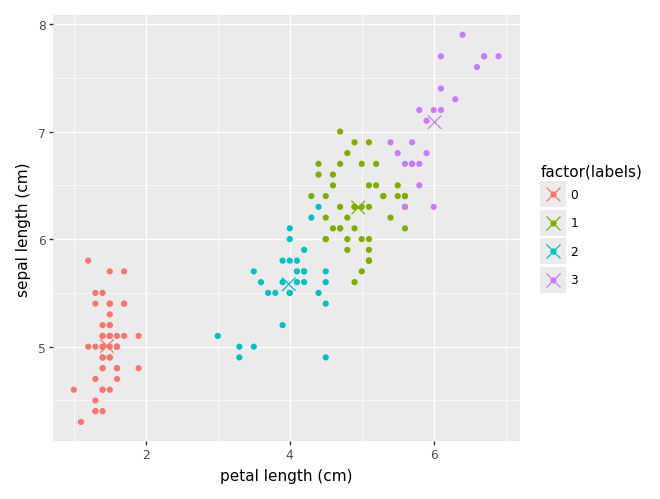

In [56]:
(
    ptn.ggplot(data = iris_df) +
    ptn.aes(x = "petal length (cm)", y = "sepal length (cm)", color = "factor(labels)") +
    ptn.geom_point() + 
    ptn.geom_point(data = iris_km, shape = "x", size = 5)
)

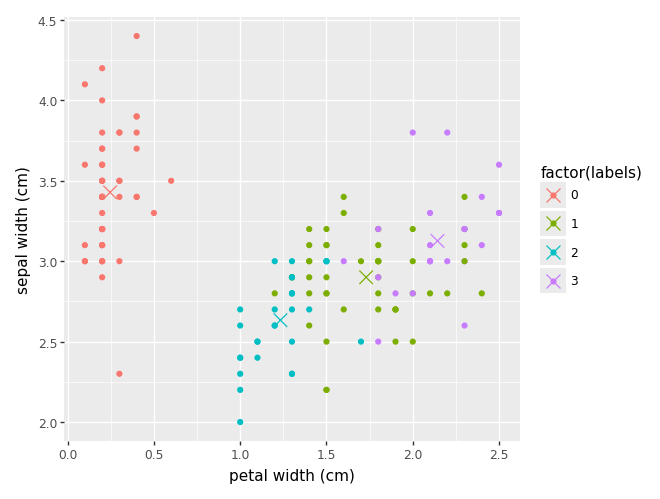

In [57]:
(
    ptn.ggplot(data = iris_df) +
    ptn.aes(x = "petal width (cm)", y = "sepal width (cm)", color = "factor(labels)") +
    ptn.geom_point() + 
    ptn.geom_point(data = iris_km, shape = "x", size = 5)
)

### Prediciendo el Cluster para una "Nueva" observación

In [58]:
new_data = pd.DataFrame(data    = [iris.data[120]],
                        columns = iris.feature_names)

km.predict(X = new_data)

array([3])

### Buscando el "Mejor" valor para K

In [59]:
# Variable para guardar el within cluster distance
sse = []

# Cantidad de cluster a probar
numK = 20

for k in range(1, numK):
    # Creando el modelo
    kmeans = KMeans(n_clusters   = k,
                    n_init       = 10,
                    random_state = 1234)
    
    # Entrenando el modelo
    kmeans.fit(X = iris.data)

    # Obteniendo el valor del within cluster distance
    sse.append(kmeans.inertia_)

sse

[681.3706000000001,
 152.34795176035792,
 78.851441426146,
 57.22847321428573,
 46.44618205128205,
 39.03998724608724,
 34.421674242424245,
 30.064593073593077,
 28.141826859415097,
 25.99389074960128,
 25.270349758085057,
 23.44303157626687,
 21.329960735171262,
 20.514432777018307,
 18.663538140222357,
 18.098196446320014,
 17.311405366692135,
 16.473661588411588,
 15.869462842712847]

In [60]:
wcd_df = pd.DataFrame(data    = range(1, numK),
                      columns = ["numK"])

wcd_df["sse"] = sse
wcd_df

,numK,sse
0,1,681.370600
1,2,152.347952
2,3,78.851441
3,4,57.228473
4,5,46.446182
5,6,39.039987
6,7,34.421674
7,8,30.064593
8,9,28.141827
9,10,25.993891


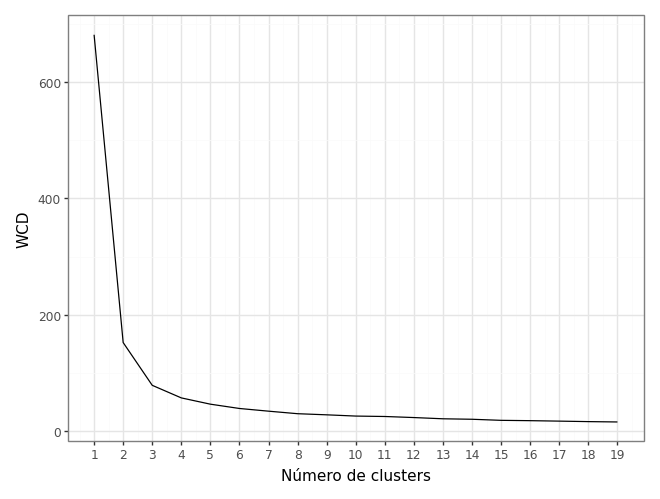

In [61]:
# Graficando
wcd_df = pd.DataFrame(data    = range(1, numK),
                      columns = ["numK"])

wcd_df["sse"] = sse

(
  ptn.ggplot(data = wcd_df) + 
  ptn.aes(x = "numK", y = "sse") +
  ptn.theme_bw() + 
  ptn.geom_line() +
  ptn.labs(x = "Número de clusters", y = "WCD") +
  ptn.scale_x_continuous(breaks = range(1, numK))
)

### ¿Qué pasa si escalamos los datos?

In [62]:
from sklearn.preprocessing import StandardScaler

# Creamos un objeto de la clase StandardScaler
scaler = StandardScaler()

# Estandarización los datos (media 0, varianza 1)
scaled_features = scaler.fit_transform(X = iris.data)
print(scaled_features)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

In [63]:
# Aplicando el mismo proceso anterior para buscar el número de K
sse_scaled  = []
numK        = 20

for k in range(1, numK):
    kmeans = KMeans(n_clusters   = k,
                    n_init       = 10,
                    random_state = 1234)
    kmeans.fit(X = scaled_features)
    sse_scaled.append(kmeans.inertia_)

sse_scaled

[600.0000000000001,
 222.36170496502305,
 139.8204963597498,
 114.30480331856764,
 90.80759161913356,
 80.02249599557437,
 71.81371300822667,
 63.00741899404803,
 54.760704117505774,
 47.20072550842141,
 42.761802811992816,
 39.40038547383034,
 36.8716655988966,
 34.57800747453159,
 32.81050999987634,
 30.847848982332888,
 28.950368763921905,
 27.43930244831747,
 25.153379832281594]

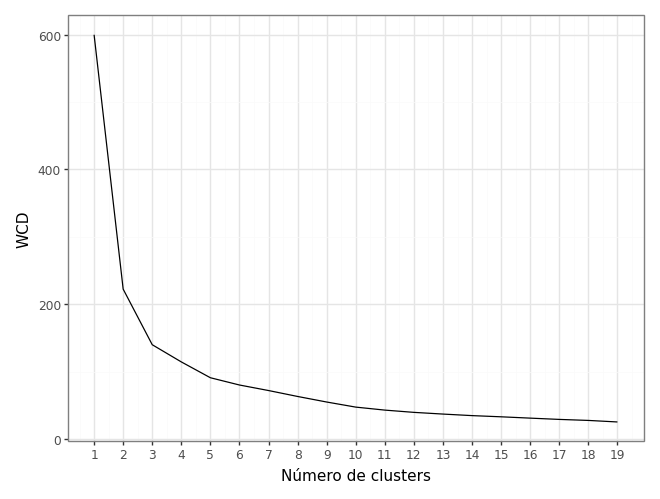

In [64]:
scaled_wcd_df = pd.DataFrame(data    = range(1, numK),
                             columns = ["numK"])
scaled_wcd_df["sse"] = sse_scaled

(
    ptn.ggplot(data = scaled_wcd_df) +
    ptn.aes(x = "numK", y = "sse") +
    ptn.theme_bw() +
    ptn.geom_line() +
    ptn.labs(x = "Número de clusters", y = "WCD") + 
    ptn.scale_x_continuous(breaks = range(1, numK))
)

# 2. K-modes

- K-modas clusteriza datos categóricos usando simple-matching distance.
- El simple-matching distance entre dos puntos corresponde al número de variables donde difieren de valor.

**Ejemplo**

|  / | V1     | V2 | V3 | V4     | V5 | V6 | V7 | V8    | V9 | V10   |
|----|:------:|:--:|:--:|:------:|:--:|:--:|:--:|:-----:|:--:|:-----:|
| p1 |  **2** |  4 |  3 |  **3** |  2 |  3 | 1  | **0** | 4  | **0** |
| p2 |  **0** |  4 |  3 |  **2** |  2 |  3 | 1  | **1** | 4  | **1** |


$smd(p1, p2) = 4$

## Existen múltiples parámetros para el modelo k-modes
https://github.com/nicodv/kmodes

``` python
modelo_KModes = KModes(n_clusters = 3,
                       max_iter   = 100,
                       init       = "Cao",
                       n_init     = 1,
                       verbose    = 1)
```
donde:

- `n_clusters`: número de clusters. Default: 8
- `max_iter`: máximo número de iteraciones.  default: 100
- `init`: Método de inicialización ('Huang', 'Cao', 'random'). Default: 'Cao'
- `n_init`: número de veces que K-modes se ejecuta.  Default: 10

## Existen múltiple métodos/funciones para el modelo k-means

- Entrenar el modelo usando ciertos datos, retorna el modelo entrenado.
``` python
modelo_KModes.fit(X = data)
```

- Dado un modelo entrenado, determina a que clase pertenece cada punto, retorna un vector con predicciones.
``` python
modelo_KModes.predict(X = data)
```

## Caracteristicas del modelo entrenado

Una vez entrenado el modelo, existen nuevas características que podemos observar (atributos)

- `cluster_centroids_`: Centroide de los clusters
- `labels_`: Etiqueta de cada punto
- `cost_`: Suma de todos los puntos con respecto a los centroides
- `n_iter_`: número de iteraciones para el algoritmo

### Preparando los datos

In [65]:
# Cargando y viendo los datos
bank = pd.read_csv('C:\\mii\\DS_MII_2025-20\\data\\bank.csv',
                   sep = ';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [66]:
# Extrayendo las variables nominales
bank_nominales = bank[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']]

print("Variables nominales/ordinales:")
bank_nominales.head()

Variables nominales/ordinales:


,job,marital,education,default,housing,loan,contact,month,poutcome
0,unemployed,married,primary,no,no,no,cellular,oct,unknown
1,services,married,secondary,no,yes,yes,cellular,may,failure
2,management,single,tertiary,no,yes,no,cellular,apr,failure
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown


In [67]:
# Agregando edad como variable categorica
bank_nominales = bank_nominales.copy()

bank_nominales['edad'] = pd.cut(x      = bank['age'],
                                bins   = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                                labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])
bank_nominales.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,edad
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,20-30
1,services,married,secondary,no,yes,yes,cellular,may,failure,30-40
2,management,single,tertiary,no,yes,no,cellular,apr,failure,30-40
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,20-30
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,50-60


In [68]:
# Viendo el resumen de los datos
bank_nominales.describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,edad
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,8
top,management,married,secondary,no,yes,no,cellular,may,unknown,30-40
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,1800


In [69]:
bank_nominales.isnull()

,job,marital,education,default,housing,loan,contact,month,poutcome,edad
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
4516,False,False,False,False,False,False,False,False,False,False
4517,False,False,False,False,False,False,False,False,False,False
4518,False,False,False,False,False,False,False,False,False,False
4519,False,False,False,False,False,False,False,False,False,False


In [70]:
# Verificando si existe algún valor nulo
bank_nominales.isnull().sum()

job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
month        0
poutcome     0
edad         0
dtype: int64

In [71]:
# Transformando los datos a números (sklearn no trabaja con datos categóricos)
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

# Copia de los datos de origen
bank_cust_orig = bank_nominales.copy()

bank_nominales_transf = bank_nominales.apply(le.fit_transform)

bank_nominales_transf

,job,marital,education,default,housing,loan,contact,month,poutcome,edad
0,10,1,0,0,0,0,0,10,3,1
1,7,1,1,0,1,1,0,8,0,2
2,4,2,2,0,1,0,0,0,0,2
3,4,1,2,0,1,1,2,6,3,1
4,1,1,1,0,1,0,2,8,3,4
...,...,...,...,...,...,...,...,...,...,...
4516,7,1,1,0,1,0,0,5,3,2
4517,6,1,2,1,1,1,2,8,3,4
4518,9,1,1,0,0,0,0,1,3,4
4519,1,1,1,0,0,0,0,3,1,1


### Ajustando (entrenando) el modelo

In [72]:
from kmodes.kmodes import KModes

# Creando el modelo y ajustándolo
km_cao = KModes(n_clusters   = 3,
                init         = "Cao",
                n_init       = 1,
                verbose      = 1,
                random_state = 1234)

# Ajustando (entrenando) el modelo
km_cao = km_cao.fit(X = bank_nominales_transf)

print("Cluster 0:", sum(km_cao.labels_ == 0))
print("Cluster 1:", sum(km_cao.labels_ == 1))
print("Cluster 2:", sum(km_cao.labels_ == 2))

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 424, cost: 15763.0
Run 1, iteration: 2/100, moves: 288, cost: 15763.0
Cluster 0: 3012
Cluster 1: 652
Cluster 2: 857


In [73]:
# Veamos los centroides
print(bank_nominales_transf.columns)

# Iterando sobre cada punto
for i in range(km_cao.n_clusters):
    
    # Iterando sobre cada columna
    for j in range(len(km_cao.cluster_centroids_[i, ])):
        
        le.fit(bank_cust_orig.iloc[:, j])
        
        print(list(le.inverse_transform([km_cao.cluster_centroids_[i, j]])), " ", end = "")
    
    print("")

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'edad'],
      dtype='object')
['management']  ['married']  ['secondary']  ['no']  ['yes']  ['no']  ['cellular']  ['may']  ['unknown']  ['30-40']  
['technician']  ['single']  ['tertiary']  ['no']  ['no']  ['no']  ['unknown']  ['jun']  ['unknown']  ['50-60']  
['blue-collar']  ['married']  ['primary']  ['no']  ['no']  ['no']  ['cellular']  ['jul']  ['unknown']  ['40-50']  


### Prediciendo el Cluster para una "Nueva" observación

In [74]:
bank_nominales_transf.iloc[[0]]

,job,marital,education,default,housing,loan,contact,month,poutcome,edad
0,10,1,0,0,0,0,0,10,3,1


In [75]:
km_cao.predict(X = bank_nominales_transf.iloc[[0]])

array([2], dtype=uint16)

# 3. Interpretación de Modelos de Cluster

- Interpretar un cluster es tan importante como crear los clusters. Este es el proceso que nos genera información.
- Desafortunadamente, la interpretación de un cluster es una mezcla entre matemáticas e intuición (gran parte).
- Veremos 3 métodos para interpretar clusters:
    - Modelos de Clasificación
    - PCA
    - Análisis de Centros

## Cargando los datos

In [76]:
from sklearn import datasets

# Cargando el dataset de vino
wine = datasets.load_wine()

# Analizando las variables que tiene
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [77]:
# Analizando las variables que tiene
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [78]:
wine_df = pd.DataFrame(data = wine.data)
wine_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Flujo completo: preparado los datos, buscando el mejor valor para K

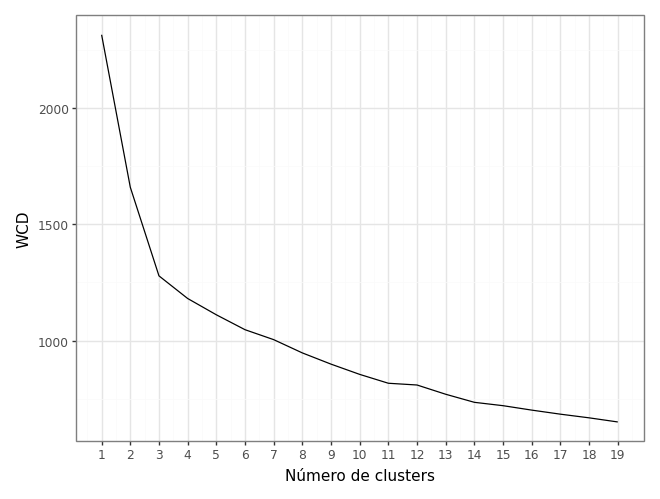

In [79]:
# Escalando los datos
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Creamos un objeto de la clase StandardScaler
scaler = StandardScaler()

# Transformamos los datos
scaled_features = scaler.fit_transform(X = wine.data)

# Buscando el número de clusters
sse        = []
maxCluster = 20

for k in range(1, maxCluster):

    kmeans = KMeans(n_clusters   = k,
                    n_init       = 10,
                    random_state = 1234)
    
    kmeans.fit(X = scaled_features)
    sse.append(kmeans.inertia_)

wcd_df = pd.DataFrame(data    = range(1, maxCluster),
                      columns = ["numK"])

wcd_df["sse"] = sse

(
    ptn.ggplot(data = wcd_df) +
    ptn.aes(x = "numK", y = "sse") + 
    ptn.theme_bw() + 
    ptn.geom_line() + 
    ptn.labs(x = "Número de clusters", y = "WCD") +
    ptn.scale_x_continuous(breaks = range(1, maxCluster))
)


## Ajustando el mejor modelo (K = 3)

In [80]:
# Aplicando el número de clusters seleccionado
selectedCluster = 3
kmeans = KMeans(n_clusters   = selectedCluster,
                n_init       = 10,
                random_state = 1234)

kmeans.fit(X = scaled_features)

,n_clusters,3
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,1234
,copy_x,True
,algorithm,'lloyd'


In [81]:
pd.Series(kmeans.labels_).value_counts()

2    65
1    62
0    51
Name: count, dtype: int64

## Interpretando el modelo anterior usando Árbol de clasificación

- Dada una clusterización, se aplica un modelo de clasificación “informativo” para separar los datos en los clusters generados.
- El modelo obtenido se interpreta, obteniendo las variables más importantes.

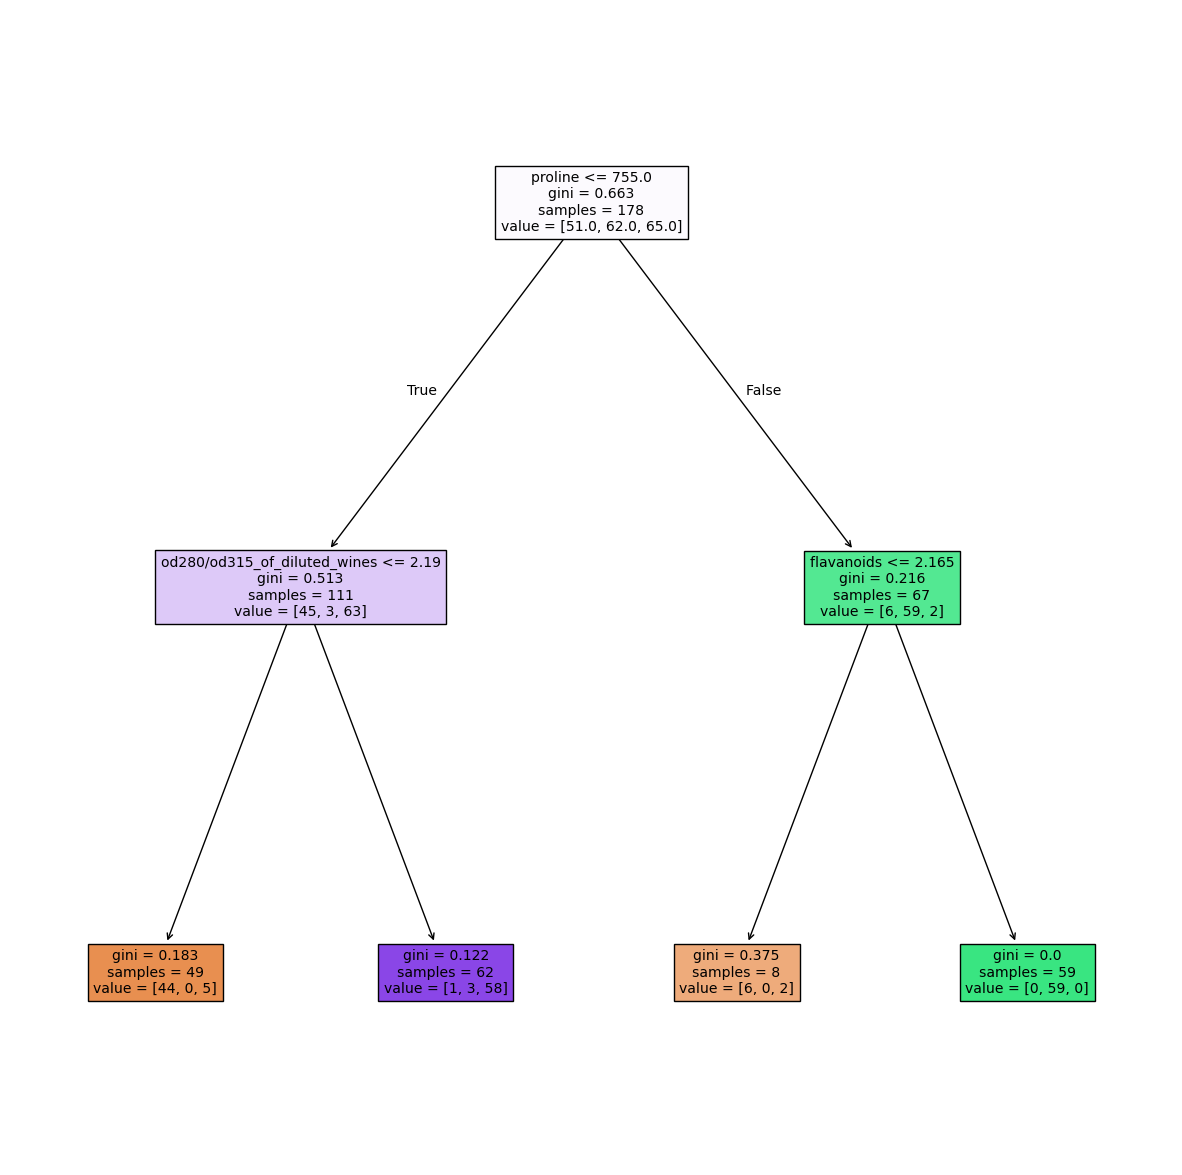

In [82]:
# Posteriormente veremos y entenderemos más sobre el árbol de decisión
import matplotlib.pyplot as plt

# Creando un objeto de la clase tree
from sklearn import tree

wine_df = pd.DataFrame(data    = wine.data,
                       columns = wine.feature_names)

clf = tree.DecisionTreeClassifier(max_depth    = 2,
                                  random_state = 1234)

clf = clf.fit(X = wine_df,
              y = kmeans.labels_.astype("str"))

plt.figure(figsize = (15, 15))
tree.plot_tree(clf,
               feature_names = wine.feature_names,
               filled        = True) 
plt.show()

## Interpretando el modelo anterior usando PCA

- Dada una clusterización, se aplica PCA a los datos originales y se analiza en forma visual y matemática las dos primeras componentes.
- El análisis se hace en conjunto a los loadings plots.

In [83]:
scaled_features

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [84]:
# Creando el objeto y aplicando PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

pca.fit(X = scaled_features)

pca_scaled_features = pca.transform(X = scaled_features)

pca_scaled_features

array([[ 3.31675081,  1.44346263],
       [ 2.20946492, -0.33339289],
       [ 2.51674015,  1.0311513 ],
       [ 3.75706561,  2.75637191],
       [ 1.00890849,  0.86983082],
       [ 3.05025392,  2.12240111],
       [ 2.44908967,  1.17485013],
       [ 2.05943687,  1.60896307],
       [ 2.5108743 ,  0.91807096],
       [ 2.75362819,  0.78943767],
       [ 3.47973668,  1.30233324],
       [ 1.7547529 ,  0.61197723],
       [ 2.11346234,  0.67570634],
       [ 3.45815682,  1.13062988],
       [ 4.31278391,  2.09597558],
       [ 2.3051882 ,  1.66255173],
       [ 2.17195527,  2.32730534],
       [ 1.89897118,  1.63136888],
       [ 3.54198508,  2.51834367],
       [ 2.0845222 ,  1.06113799],
       [ 3.12440254,  0.78689711],
       [ 1.08657007,  0.24174355],
       [ 2.53522408, -0.09184062],
       [ 1.64498834, -0.51627893],
       [ 1.76157587, -0.31714893],
       [ 0.9900791 ,  0.94066734],
       [ 1.77527763,  0.68617513],
       [ 1.23542396, -0.08980704],
       [ 2.18840633,

In [85]:
pca_scaled_features_df = pd.DataFrame(data    = pca_scaled_features,
                                      columns = ["PC1", "PC2"])

pca_scaled_features_df["labels"] = kmeans.labels_

pca_scaled_features_df

,PC1,PC2,labels
0,3.316751,1.443463,1
1,2.209465,-0.333393,1
2,2.516740,1.031151,1
3,3.757066,2.756372,1
4,1.008908,0.869831,1
...,...,...,...
173,-3.370524,2.216289,0
174,-2.601956,1.757229,0
175,-2.677839,2.760899,0
176,-2.387017,2.297347,0


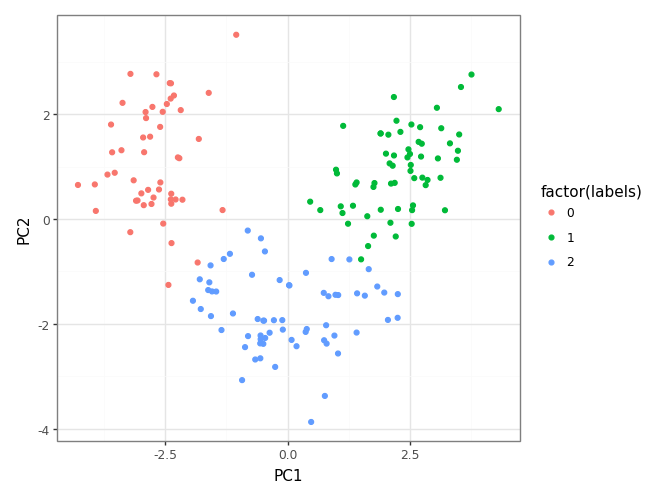

In [86]:
(
    ptn.ggplot(data = pca_scaled_features_df) +
    ptn.aes(x = "PC1", y = "PC2", color = "factor(labels)") +
    ptn.geom_point(show_legend = True) +
    ptn.theme_bw()
)

In [87]:
# Analizando los componentes
data_pca = pd.DataFrame(data    = pca.components_.transpose(),
                        columns = ["PC1", "PC2"])

data_pca['varNames'] = wine.feature_names

data_pca


,PC1,PC2,varNames
0,0.144329,0.483652,alcohol
1,-0.245188,0.224931,malic_acid
2,-0.002051,0.316069,ash
3,-0.239320,-0.010591,alcalinity_of_ash
4,0.141992,0.299634,magnesium
5,0.394661,0.065040,total_phenols
6,0.422934,-0.003360,flavanoids
7,-0.298533,0.028779,nonflavanoid_phenols
8,0.313429,0.039302,proanthocyanins
9,-0.088617,0.529996,color_intensity


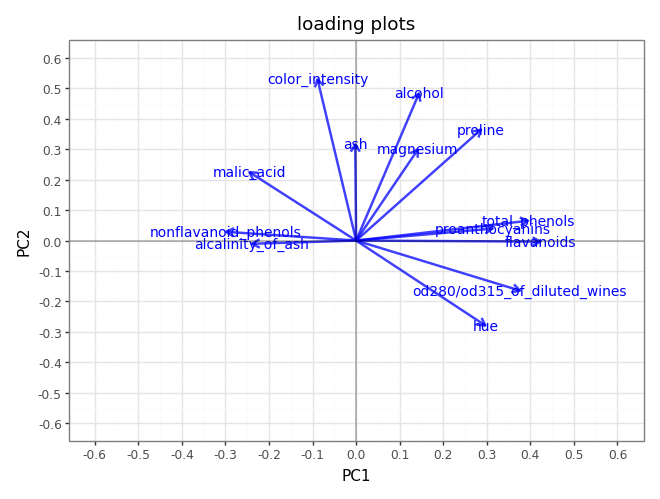

In [88]:
(
    ptn.ggplot(data = data_pca)+
    ptn.theme_bw()+
    ptn.labs(title = "loading plots")+
    ptn.geom_text(ptn.aes(x = "PC1", y = "PC2", label = "varNames"), size = 10, color = "blue") +
    ptn.geom_segment(ptn.aes(x = 0, y = 0, xend = "PC1", yend = "PC2"), arrow = ptn.arrow(length = 0.1), size = 1, alpha = 0.75, color = "blue") +
    ptn.scale_x_continuous(limits = [-0.9, 0.9], breaks = [-0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]) +
    ptn.scale_y_continuous(limits = [-0.9, 0.9], breaks = [-0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]) +
    ptn.geom_hline(yintercept = 0, size = 0.2) +
    ptn.geom_vline(xintercept = 0, size = 0.2) +
    ptn.coord_cartesian([-0.6, 0.6], [-0.6, 0.6])
)

## Interpretando el modelo anterior usando Análisis de centroides

- Permite determinar claramente las diferencias entre cada cluster.
- Es necesario analizar cada variable por separado.
- La mejor visualización es una tabla, pero es complejo de entender para personas no relacionadas al tema.
- Algunos métodos pueden tener centroides similares y modelar datos completamente diferentes (dataset tipo dona).

In [89]:
KMcentroids = pd.DataFrame(data    = kmeans.cluster_centers_,
                           columns = wine.feature_names)
KMcentroids

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.164907,0.871547,0.186898,0.524367,-0.075473,-0.979330,-1.215248,0.726064,-0.779706,0.941539,-1.164789,-1.292412,-0.407088
1,0.835232,-0.303810,0.364706,-0.610191,0.577587,0.885237,0.977820,-0.562090,0.580287,0.171063,0.473984,0.779247,1.125185
2,-0.926072,-0.394042,-0.494517,0.170602,-0.491712,-0.075983,0.020813,-0.033534,0.058266,-0.901914,0.461804,0.270764,-0.753846


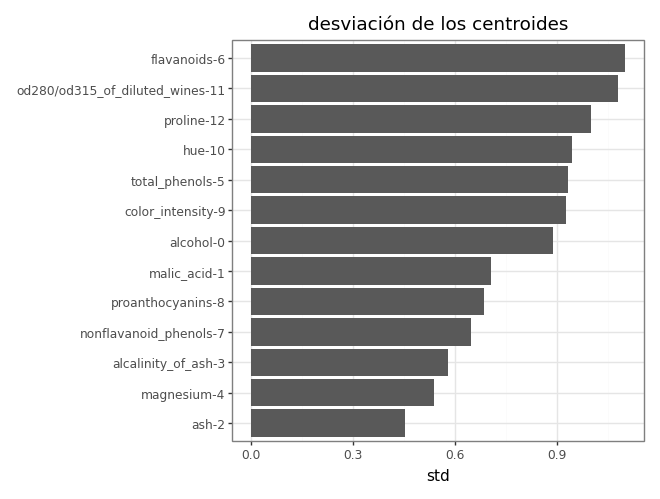

In [90]:
KMcentroids_df = pd.DataFrame(data    = KMcentroids.std(),
                              columns = ["std"])

KMcentroids_df["varNames"] = wine.feature_names

for i in range(len(KMcentroids_df)):

    KMcentroids_df.iloc[i, KMcentroids_df.columns.get_loc("varNames")] += f"-{i}"

orderVar = KMcentroids_df.sort_values("std")["varNames"]

(
    ptn.ggplot(data = KMcentroids_df) +
    ptn.aes(y = "std", x = "varNames") +
    ptn.theme_bw() +
    ptn.geom_col() +
    ptn.scale_x_discrete(limits = orderVar) +
    ptn.coord_flip() +
    ptn.labs(title = "desviación de los centroides", x = "")
)

In [91]:
KMcentroids_df

,std,varNames
alcohol,0.888985,alcohol-0
malic_acid,0.706083,malic_acid-1
ash,0.453543,ash-2
alcalinity_of_ash,0.580519,alcalinity_of_ash-3
magnesium,0.539002,magnesium-4
total_phenols,0.932433,total_phenols-5
flavanoids,1.099489,flavanoids-6
nonflavanoid_phenols,0.647521,nonflavanoid_phenols-7
proanthocyanins,0.686086,proanthocyanins-8
color_intensity,0.925854,color_intensity-9


In [92]:
# Analizando la variable que queremos ver
varToAnalyze = 0

var_0 = pd.DataFrame(data    = np.zeros(shape = (kmeans.n_clusters, 2)),
                   columns = ["mean", "std"])

for i in range(kmeans.n_clusters):

    var_0.loc[i, "mean"] = wine.data[kmeans.labels_ == i, varToAnalyze].mean()
    var_0.loc[i, "std"]  = wine.data[kmeans.labels_ == i, varToAnalyze].std()

var_0

,mean,std
0,13.134118,0.516714
1,13.676774,0.554567
2,12.250923,0.528894


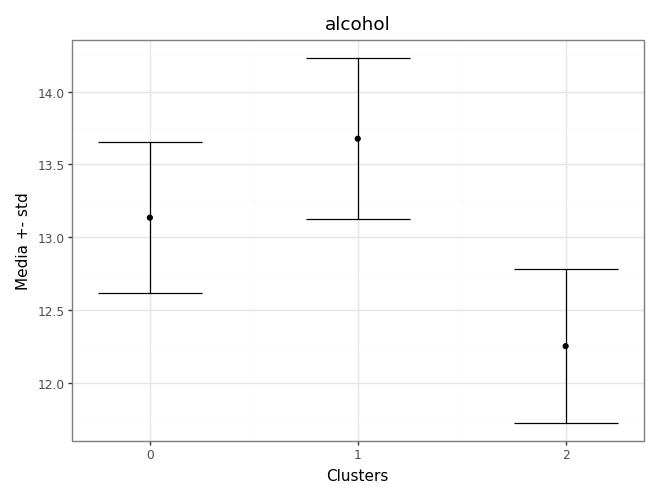

In [93]:
# Crenado el gráfico
(
    ptn.ggplot(data = var_0) +
    ptn.aes(x = range(kmeans.n_clusters), y = "mean", ymin = "mean-std", ymax = "mean+std") +
    ptn.theme_bw() +
    ptn.geom_errorbar() +
    ptn.geom_point() +
    ptn.scale_x_continuous(breaks = range(kmeans.n_clusters)) +
    ptn.labs(x = "Clusters", y = "Media +- std", title = wine.feature_names[varToAnalyze])
)

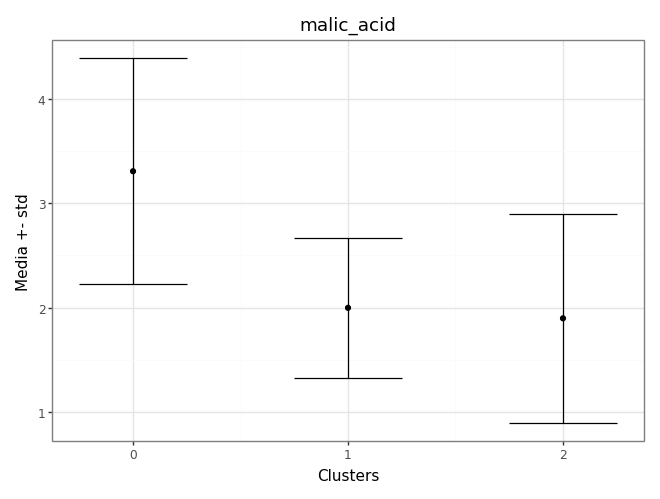

In [94]:
# Analizando la variable que queremos ver
varToAnalyze = 1

var_1 = pd.DataFrame(data    = np.zeros(shape = (kmeans.n_clusters, 2)),
                   columns = ["mean", "std"])

for i in range(kmeans.n_clusters):

    var_1.loc[i, "mean"] = wine.data[kmeans.labels_ == i, varToAnalyze].mean()
    var_1.loc[i, "std"]  = wine.data[kmeans.labels_ == i, varToAnalyze].std()


# Crenado el gráfico
(
    ptn.ggplot(data = var_1) +
    ptn.aes(x = range(kmeans.n_clusters), y = "mean", ymin = "mean-std", ymax = "mean+std") +
    ptn.theme_bw() +
    ptn.geom_errorbar() +
    ptn.geom_point() +
    ptn.scale_x_continuous(breaks = range(kmeans.n_clusters)) +
    ptn.labs(x = "Clusters", y = "Media +- std", title = wine.feature_names[varToAnalyze])
)

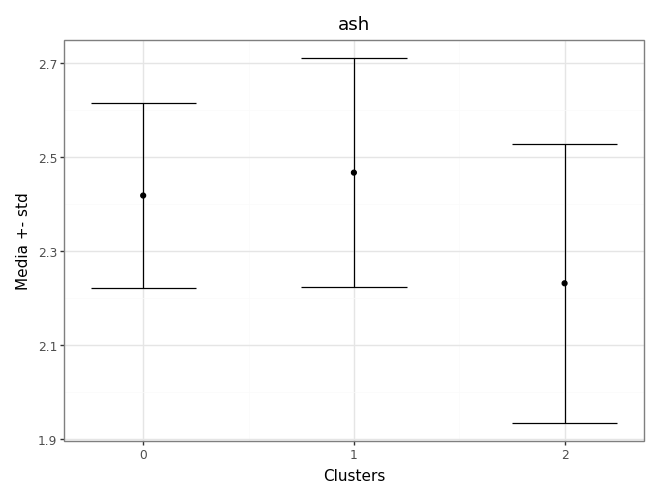

In [95]:
# Analizando la variable que queremos ver
varToAnalyze = 2

var_2 = pd.DataFrame(data    = np.zeros(shape = (kmeans.n_clusters, 2)),
                   columns = ["mean", "std"])

for i in range(kmeans.n_clusters):

    var_2.loc[i, "mean"] = wine.data[kmeans.labels_ == i, varToAnalyze].mean()
    var_2.loc[i, "std"]  = wine.data[kmeans.labels_ == i, varToAnalyze].std()


# Crenado el gráfico
(
    ptn.ggplot(data = var_2) +
    ptn.aes(x = range(kmeans.n_clusters), y = "mean", ymin = "mean-std", ymax = "mean+std") +
    ptn.theme_bw() +
    ptn.geom_errorbar() +
    ptn.geom_point() +
    ptn.scale_x_continuous(breaks = range(kmeans.n_clusters)) +
    ptn.labs(x = "Clusters", y = "Media +- std", title = wine.feature_names[varToAnalyze])
)

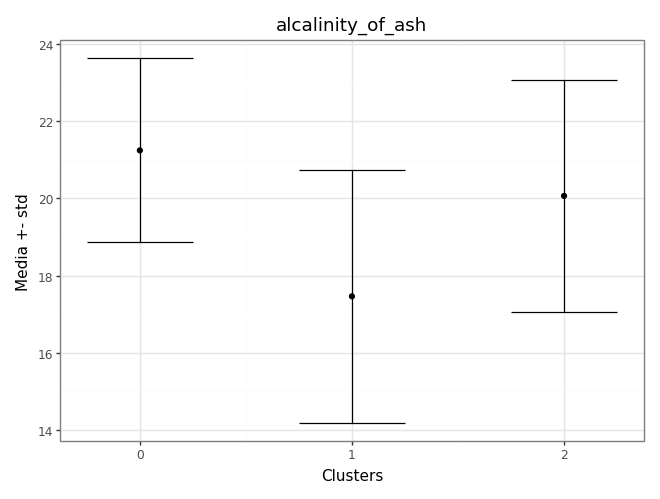

In [96]:
# Analizando la variable que queremos ver
varToAnalyze = 3

var_3 = pd.DataFrame(data    = np.zeros(shape = (kmeans.n_clusters, 2)),
                   columns = ["mean", "std"])

for i in range(kmeans.n_clusters):

    var_3.loc[i, "mean"] = wine.data[kmeans.labels_ == i, varToAnalyze].mean()
    var_3.loc[i, "std"]  = wine.data[kmeans.labels_ == i, varToAnalyze].std()


# Crenado el gráfico
(
    ptn.ggplot(data = var_3) +
    ptn.aes(x = range(kmeans.n_clusters), y = "mean", ymin = "mean-std", ymax = "mean+std") +
    ptn.theme_bw() +
    ptn.geom_errorbar() +
    ptn.geom_point() +
    ptn.scale_x_continuous(breaks = range(kmeans.n_clusters)) +
    ptn.labs(x = "Clusters", y = "Media +- std", title = wine.feature_names[varToAnalyze])
)

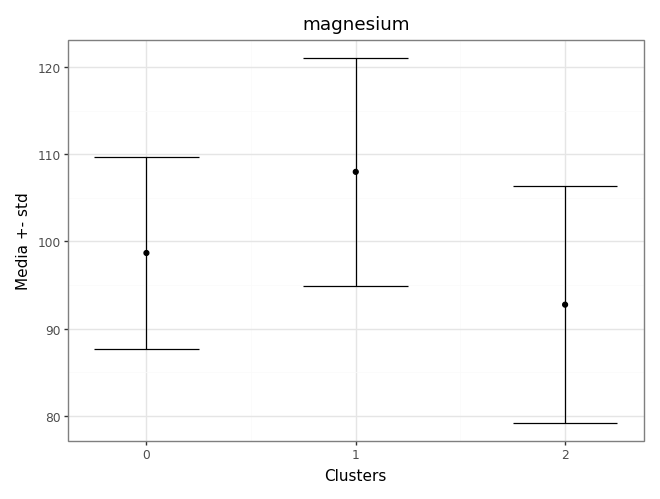

In [97]:
# Analizando la variable que queremos ver
varToAnalyze = 4

var_4 = pd.DataFrame(data    = np.zeros(shape = (kmeans.n_clusters, 2)),
                   columns = ["mean", "std"])

for i in range(kmeans.n_clusters):

    var_4.loc[i, "mean"] = wine.data[kmeans.labels_ == i, varToAnalyze].mean()
    var_4.loc[i, "std"]  = wine.data[kmeans.labels_ == i, varToAnalyze].std()


# Crenado el gráfico
(
    ptn.ggplot(data = var_4) +
    ptn.aes(x = range(kmeans.n_clusters), y = "mean", ymin = "mean-std", ymax = "mean+std") +
    ptn.theme_bw() +
    ptn.geom_errorbar() +
    ptn.geom_point() +
    ptn.scale_x_continuous(breaks = range(kmeans.n_clusters)) +
    ptn.labs(x = "Clusters", y = "Media +- std", title = wine.feature_names[varToAnalyze])
)

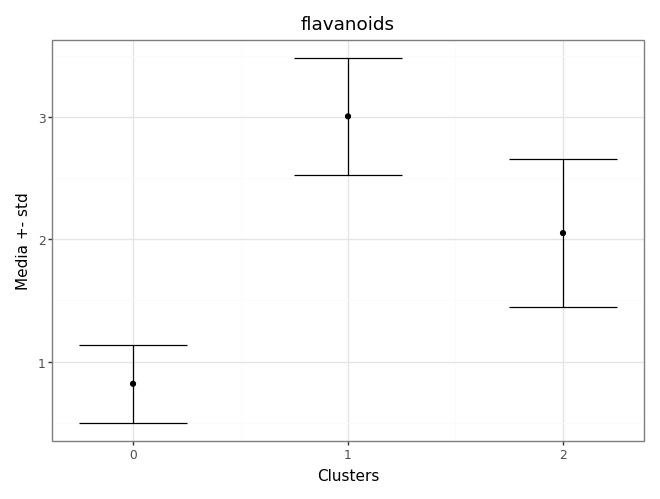

In [98]:
# Analizando la variable que queremos ver
varToAnalyze = 6

var_0 = pd.DataFrame(data    = np.zeros(shape = (kmeans.n_clusters, 2)),
                   columns = ["mean", "std"])

for i in range(kmeans.n_clusters):

    var_0.loc[i, "mean"] = wine.data[kmeans.labels_ == i, varToAnalyze].mean()
    var_0.loc[i, "std"]  = wine.data[kmeans.labels_ == i, varToAnalyze].std()


# Crenado el gráfico
(
    ptn.ggplot(data = var_0) +
    ptn.aes(x = range(kmeans.n_clusters), y = "mean", ymin = "mean-std", ymax = "mean+std") +
    ptn.theme_bw() +
    ptn.geom_errorbar() +
    ptn.geom_point() +
    ptn.scale_x_continuous(breaks = range(kmeans.n_clusters)) +
    ptn.labs(x = "Clusters", y = "Media +- std", title = wine.feature_names[varToAnalyze])
)

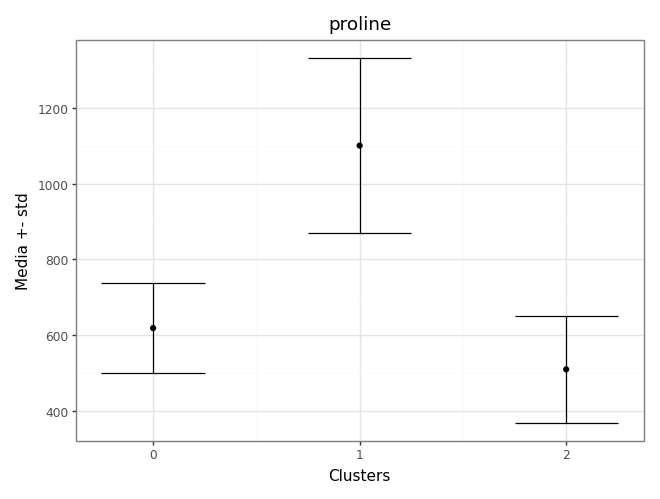

In [99]:
# Analizando la variable que queremos ver
varToAnalyze = 12

var_0 = pd.DataFrame(data    = np.zeros(shape = (kmeans.n_clusters, 2)),
                   columns = ["mean", "std"])

for i in range(kmeans.n_clusters):

    var_0.loc[i, "mean"] = wine.data[kmeans.labels_ == i, varToAnalyze].mean()
    var_0.loc[i, "std"]  = wine.data[kmeans.labels_ == i, varToAnalyze].std()


# Crenado el gráfico
(
    ptn.ggplot(data = var_0) +
    ptn.aes(x = range(kmeans.n_clusters), y = "mean", ymin = "mean-std", ymax = "mean+std") +
    ptn.theme_bw() +
    ptn.geom_errorbar() +
    ptn.geom_point() +
    ptn.scale_x_continuous(breaks = range(kmeans.n_clusters)) +
    ptn.labs(x = "Clusters", y = "Media +- std", title = wine.feature_names[varToAnalyze])
)